In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# CX Kaggle Competition: Mobile Price Classification

In this notebook you will be working on visualizing a Kaggle dataset containing sales data of mobiles phones of various companies. We'll perform Exploratory Data Analysis and learn some preliminary tips for working with matplotlib (a Python plotting library).

### Table of Contents

* [1. Data Loading](#loading)
* [2. Exploring the Features](#features)
* [3. Exploring Differences in Price](#response)
* [4. Relationships between Features and Response](#relations)

### Hosted by and maintained by the [SAAS](https://saas.berkeley.edu). Authored by Carlos Gonzalez and Suparna Kompalli. 

<span id="loading"></span>

## Data Loading 

**Question 1:** Let's load our training and test sets using Pandas' ```pd.read_csv``` function. Fill in the following two lines with code which loads the ```train.csv``` and ```test.csv``` data sets into a ```pandas.DataFrame``` object. 

In [4]:
train = pd.read_csv('true_train.csv')
test = pd.read_csv('true_test.csv')

display(train.head())

print(f'The columns in the data frame are: {list(train.columns)[1:]}')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
4,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3


The columns in the data frame are: ['blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


**Question 2:** Now, we want to create a combined data set for the first step in our EDA process. Use Pandas' ```pd.concat``` function to append the rows of the training and test data sets together. 

In [5]:
combined = pd.concat([train, test], axis=0)
combined.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1.0
4,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3.0


<span id="features"></span>

## Exploring the Features

**Question 3:** Use the ```combined``` dataframe to visualize the distributions of two quantitative features of your choice. 

*Hint: What is a good visualization chart for a quantitative variable?*

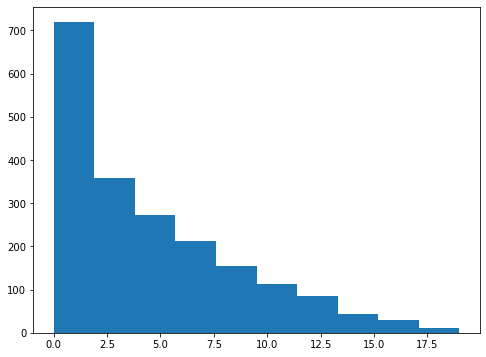

In [59]:
# Generate visualization #1 

plt.figure(figsize=(8, 6))
plt.hist(combined['fc'], bins=10);

**Interpretation:** This is a right-tailed distribution.

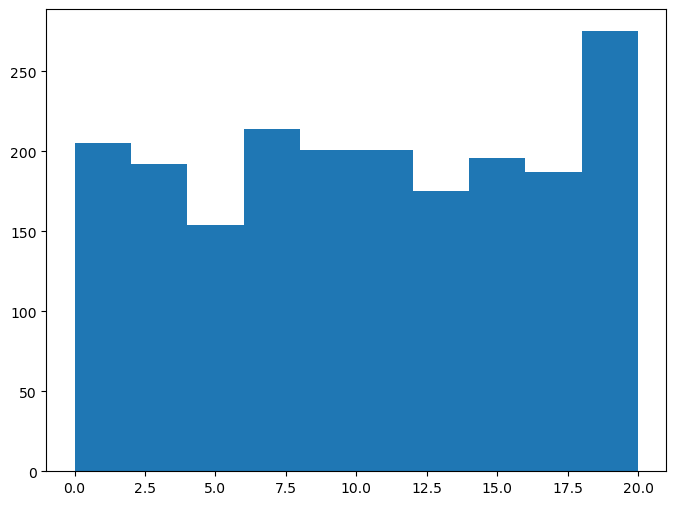

In [9]:
# Generate visualization #2 

plt.figure(figsize=(8, 6))
plt.hist(combined['pc'], bins=10);

**Interpretation:** Here we see a left tailed distribution.

**Question 4:** Use the Pandas' function ```df.describe()``` to generate summary statistics for the features available in the combined data set. 

In [10]:
combined.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1500.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.510000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118362
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Interpretation:** ... "fc" column std very high ... 

**Question 5:** How correlated are the ```fc``` and ```pc``` features in the ```combined``` data set? Interpret this correlation in words. 

*Hint: Use ```np.corrcoef(...)``` to calculate the value of $r$, the correlation coefficient.*

In [11]:
r = np.corrcoef(combined['fc'], combined['pc'])
print(f'The value of the correlation coefficient was: {r[0, 1]}')

The value of the correlation coefficient was: 0.6445952827956326


**Answer:** There is a relatively strong, positive correlation between the number of front camera mega pixels and back camera mega pixels on a given phone. There is a linear relationship. 

**Question 6:** Use the ```combined``` dataframe to visualize the counts of two categorical features of your choice. 


*Hint: What is a good visualization chart for a categorical variable?*

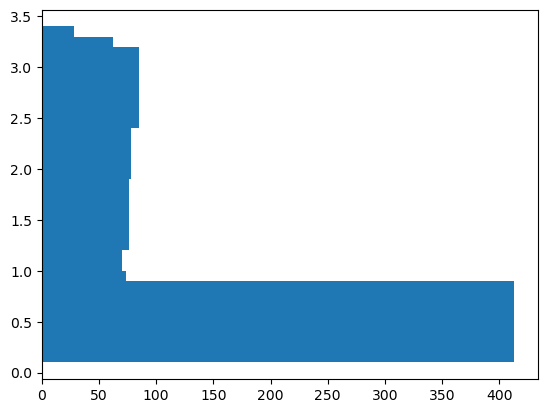

In [12]:
# Generate visualization #1 

education_counts = combined['clock_speed'].value_counts().reset_index()
plt.barh(education_counts['index'], education_counts['clock_speed']);

**Interpretation:** ...

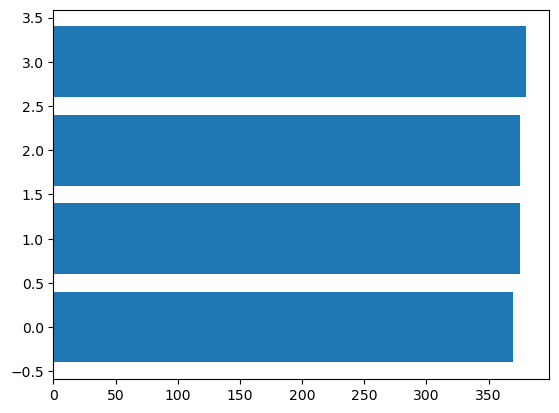

In [13]:
# Generate visualization #2

location_counts = combined['price_range'].value_counts().reset_index().sort_values('price_range', ascending=False).iloc[0:10]
plt.barh(location_counts['index'], location_counts['price_range']);

**Interpretation:** ... 

<span id="response"></span>

## Exploring Differences in Price

Now, we will restrict our EDA to the training set in order to investigate trends in the response variable. In order to investigate potential price trends, let us look at the hardware.

**Question 7:** Create a histogram displaying the distribution of varying clockspeed in the training set. 

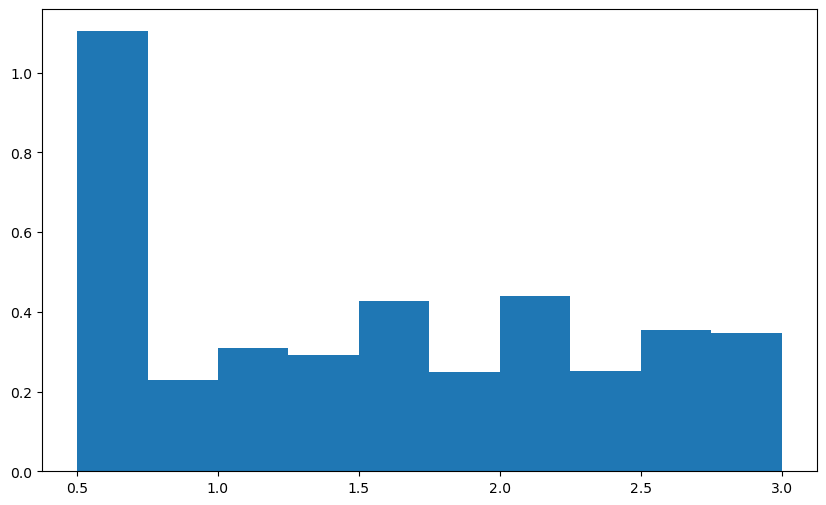

In [16]:
# Generate a histogram of salaries here 

plt.figure(figsize=(10, 6))
#plt.xlim(0, 1.5e6)
plt.hist(train['clock_speed'], bins=10, density=True);

**Question 9:** Create a scatter plot to display the relationship between ```price_range``` and ```ram```. 

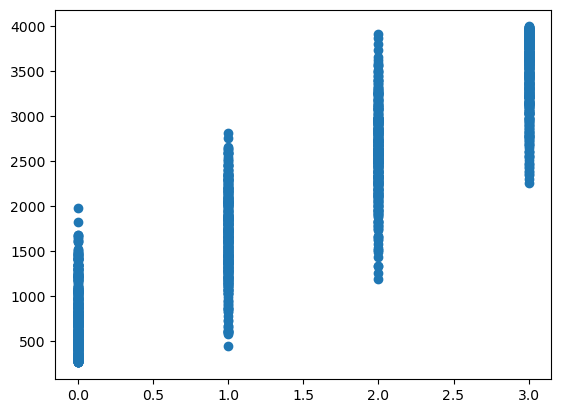

In [17]:
# Generate a scatterplot of salary vs. year here 

plt.scatter(train['price_range'], train['ram']);

<span id="relations"></span>

## Relationships between Features and Response

In the following questions, we'll look at the relationships between some features and the response variable. 

**Question 10:** Create a horizontal bar plot of the top 10 average prices by ```ram```. 

*Hint: You'll need to group the data frame first, then extract the relevant columns.*

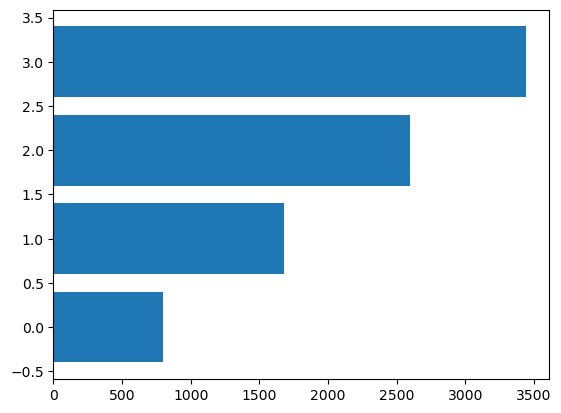

In [19]:
top_position_salary = train.groupby('price_range').agg(np.mean)[['ram']].reset_index().sort_values('ram', ascending=False).iloc[0:10, :]
plt.barh(top_position_salary['price_range'], top_position_salary['ram']); 

**Question 11:** Create a horizontal bar plot of the 10 lowest average prices by ```battery_power```. 

*Hint: You can take a similar approach to Q10, but you will need to sort the data frame in the opposite way.*

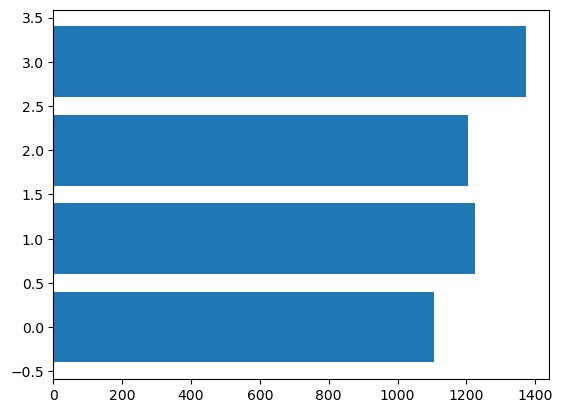

In [24]:
bot_location_salary = train.groupby('price_range').agg(np.mean)[['battery_power']].reset_index().sort_values('battery_power', ascending = True).iloc[0:10, :]
plt.barh(bot_location_salary['price_range'], bot_location_salary['battery_power']); 



Now, let's explore the relationships between quantitative features and the response variable. 

**Question 13:** Create a scatter plot to show the relationship between ```int_memory``` and the average ```ram```. Overlay the line of best fit onto the scatter plot. 

*Hint: You'll need to group the data frame first before plotting. To overlay the line of best fit, use ```np.polyfit``` with the appropriate inputs.*

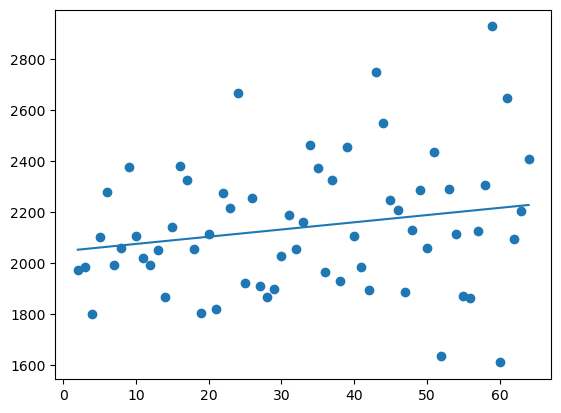

In [25]:
yoe_salary = train[['int_memory', 'ram']]
yoe_salary_means = yoe_salary.groupby('int_memory').mean().reset_index()
m, b = np.polyfit(yoe_salary_means['int_memory'], yoe_salary_means['ram'], 1) 
plt.scatter(yoe_salary_means['int_memory'], yoe_salary_means['ram'])
plt.plot(yoe_salary_means['int_memory'], m * yoe_salary_means['int_memory'] + b);

**Question 14:** Whew! We've done a lot of plotting and interpretation. Based on what you've seen so far, which features do you think are promising in terms of price_range? 

**Answer:** This is a subjective question and there are multiple right answers!